In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [3]:
dirs = 'kaggle/input/nlp-getting-started/'

In [4]:
data = pd.read_csv(dirs+"train.csv")

In [152]:
testdata = pd.read_csv(dirs+'test.csv')

In [170]:
testdata.head(2)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."


In [190]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
data.tail(60)

,id,keyword,location,text,target
7553,10798,wrecked,NaN,#news Cramer: Iger's 3 words that wrecked Disn...,0
7554,10799,wrecked,NaN,James Kunstler: How bad architecture wrecked c...,0
7555,10800,wrecked,Milwaukee County,http://t.co/DeQQOpSP4f: Iger's 3 words that wr...,0
7556,10802,wrecked,"Click the link below, okay",The Twitter update pretty much wrecked the app,0
7557,10803,wrecked,NaN,You wrecked me. Never felt so low in my life. ...,0
7558,10805,wrecked,probably not home,coleslaw #wrecked http://t.co/sijNBmCZIJ,0
7559,10808,wrecked,NaN,300K exotic car wrecked in train accident \r\n...,1
7560,10809,wrecked,NaN,The twins pitcher's ego is now WRECKED,0
7561,10810,wrecked,6,@Tunes_WGG lol. U got wrecked,0
7562,10811,wrecked,NaN,you wrecked my whole world,0


In [7]:
data[data['keyword'].notnull() & data['location'].notnull()]

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...,...
7575,10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0
7577,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0


In [8]:
data.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

# SMALL ANALYSIS

Total % of Negative and Positives are: 


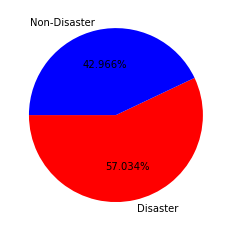

In [9]:
print("Total % of Negative and Positives are: ")
plt.pie(data['target'].value_counts(),
        labels=['Disaster','Non-Disaster'],
        colors=['r','b'],
       autopct='%.3f%%',
       startangle=180)
plt.show()

In [10]:
keywords = [] #getting all keywords 
keyword_count = [] #getting all keywords count
def count_keywords(x):
    if x not in keywords:
        keywords.append(x)
        keyword_count.append(len(data[data['keyword']==x]))
data.keyword.apply(count_keywords)

0       None
1       None
2       None
3       None
4       None
        ... 
7608    None
7609    None
7610    None
7611    None
7612    None
Name: keyword, Length: 7613, dtype: object

[]

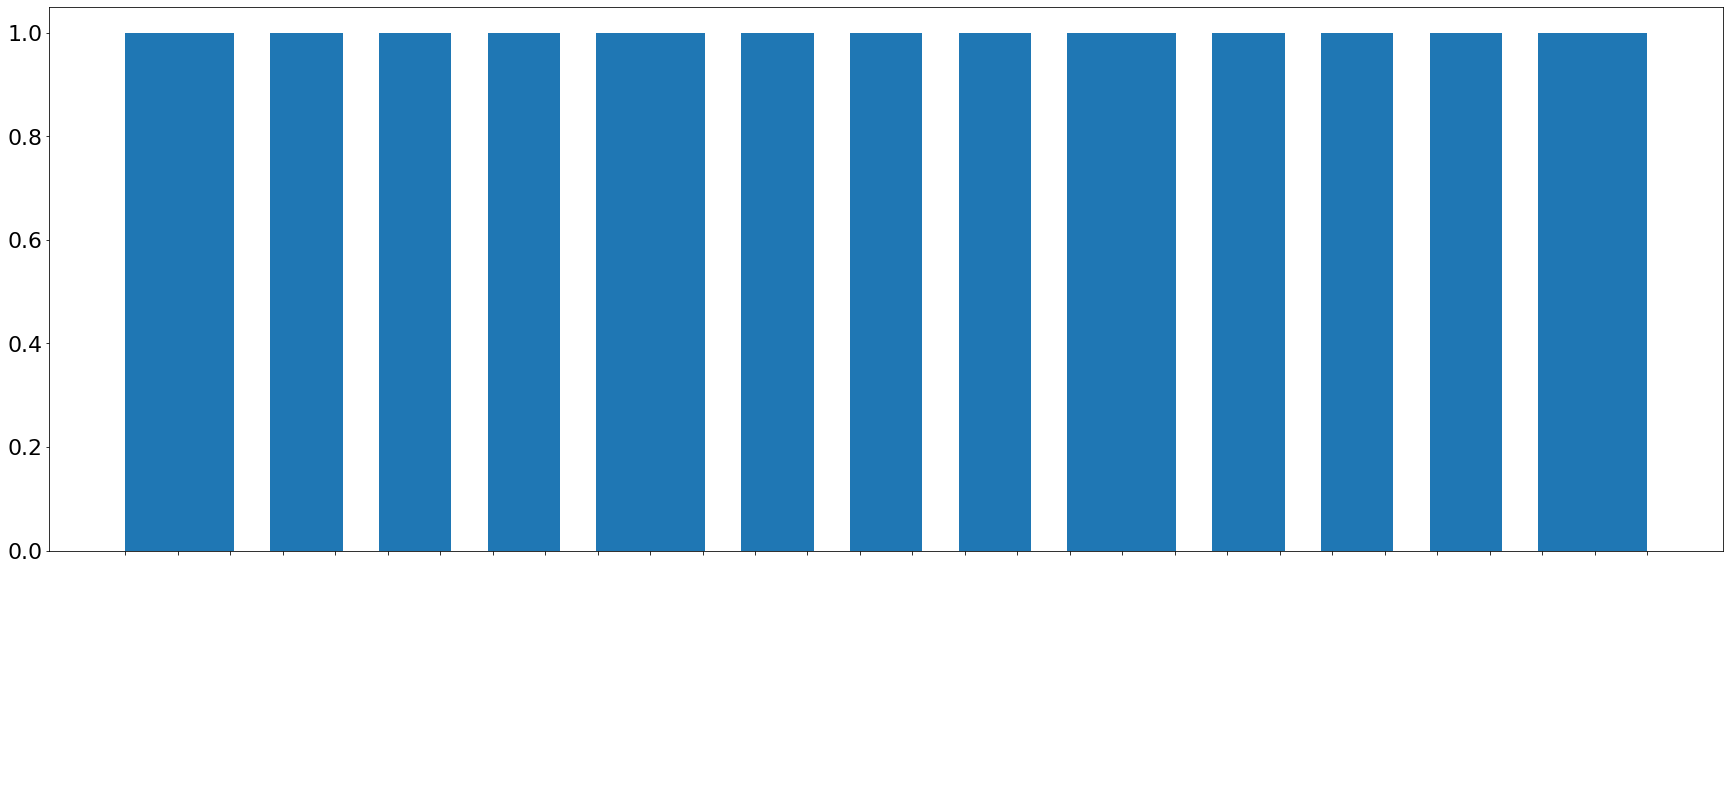

In [11]:
plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size':22})
plt.hist(keywords[:30],max(keyword_count[:30]))
plt.xticks(rotation='vertical',color='w')
plt.plot()




### Removing All NaN Columns

In [12]:
without_nan = data[data['keyword'].notnull() & data['location'].notnull()]

In [171]:
test_without_nan = testdata[testdata['keyword'].notnull() & testdata['location'].notnull()] #test data

In [13]:
without_nan

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...,...
7575,10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0
7577,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0


In [14]:
lens = without_nan.text.str.len()

In [15]:
print("MEAN is {}".format(np.mean(lens)),
      "Median is {}".format(np.median(lens)),
      "Max length tweet is {}".format(max(lens)),sep='\n')

MEAN is 102.43976377952755
Median is 109.0
Max length tweet is 155


### Histogram of the lengths of all texts 

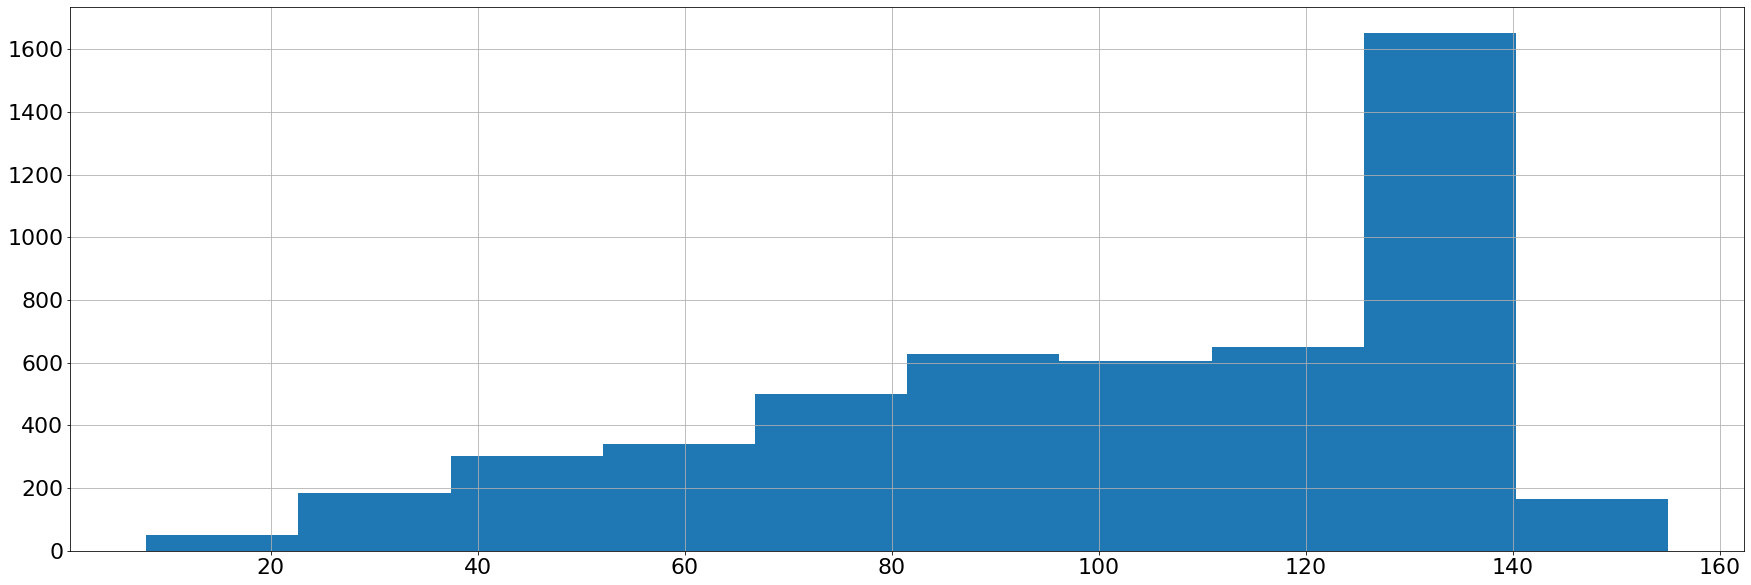

In [16]:
plt.figure(figsize=(30,10))
lens.hist()

### Deep Learning AND  Machine Learning Part

In [17]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

In [172]:
def RemoveEmojis(x):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'',x)

In [173]:
removed = without_nan.text.apply(RemoveEmojis)

In [174]:
test_removed = test_without_nan.text.apply(RemoveEmojis) #test data

In [176]:
test_without_nan.text = test_removed #test data

In [177]:
without_nan.text = removed

In [178]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

#### Removing Stop Words

In [179]:
stop_words = set(stopwords.words('english'))

In [180]:
stop_words #all stop words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

#### Lemmatization with stop Words Removal

In [181]:
lemmer = WordNetLemmatizer()

In [182]:

def RemovingStopWords(text):
    x = []
    tokens = word_tokenize(text)
    for token in tokens:
        lemmered_token = lemmer.lemmatize(token)
        x.append(lemmered_token)
    removed_words = [i for i in x if i not in stop_words]
    return TreebankWordDetokenizer().detokenize(removed_words)

In [183]:
stoped_words = without_nan.text.apply(RemovingStopWords)

In [184]:
test_stopped_words = test_without_nan.text.apply(RemovingStopWords) #test data

In [185]:
stoped_words

31      @ bbcmtd Wholesale Markets ablaze http: //t.co...
32      We always try bring heavy . #metal #RT http: /...
33      # AFRICANBAZE: Breaking news: Nigeria flag set...
34                                     Crying! Set ablaze
35      On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
                              ...                        
7575     On bright side I wrecked http: //t.co/uEa0txRHYs
7577    @ widda16...He's gone . You relax . I thought ...
7579    Three day work've pretty much wrecked hahaha s...
7580    # FX #forex #trading Cramer: Iger's 3 word wre...
7581    @ engineshed Great atmosphere British Lion gig...
Name: text, Length: 5080, dtype: object

In [186]:
test_stopped_words #test data

15      Birmingham Wholesale Market ablaze BBC News - ...
16               @ sunkxssedharry wear short race ablaze?
17      # PreviouslyOnDoyinTv: Toke MakinwaÛªs marria...
18      Check: http: //t.co/rOI2NSmEJJ http: //t.co/3T...
19      PSA: IÛªm splitting personality .?? techie fo...
                              ...                        
3246    @ yakubOObs think deactivated notification aid...
3247    RT CNBC' 3 word Disney CEO Bob Iger wrecked Di...
3248    Smackdown tyme put good mood since got wrecked...
3249    @ thrillhho jsyk In't stopped thinking abt rem...
3250    @ stighefootball Begovic ha garbage . He got w...
Name: text, Length: 2158, dtype: object

In [192]:
test_without_nan.text = test_stopped_words #text data

In [187]:
without_nan.text=stoped_words

In [188]:
without_nan

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@ bbcmtd Wholesale Markets ablaze http: //t.co...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try bring heavy . #metal #RT http: /...,0
33,50,ablaze,AFRICA,# AFRICANBAZE: Breaking news: Nigeria flag set...,1
34,52,ablaze,"Philadelphia, PA",Crying! Set ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...,...
7575,10826,wrecked,TN,On bright side I wrecked http: //t.co/uEa0txRHYs,0
7577,10829,wrecked,#NewcastleuponTyne #UK,@ widda16...He's gone . You relax . I thought ...,0
7579,10831,wrecked,"Vancouver, Canada",Three day work've pretty much wrecked hahaha s...,0
7580,10832,wrecked,London,# FX #forex #trading Cramer: Iger's 3 word wre...,0


In [193]:
test_without_nan

,id,keyword,location,text
15,46,ablaze,London,Birmingham Wholesale Market ablaze BBC News - ...
16,47,ablaze,Niall's place | SAF 12 SQUAD |,@ sunkxssedharry wear short race ablaze?
17,51,ablaze,NIGERIA,# PreviouslyOnDoyinTv: Toke MakinwaÛªs marria...
18,58,ablaze,Live On Webcam,Check: http: //t.co/rOI2NSmEJJ http: //t.co/3T...
19,60,ablaze,"Los Angeles, Califnordia",PSA: IÛªm splitting personality .?? techie fo...
...,...,...,...,...
3246,10804,wrecked,Love Reiss,@ yakubOObs think deactivated notification aid...
3247,10806,wrecked,Seattle Washington,RT CNBC' 3 word Disney CEO Bob Iger wrecked Di...
3248,10807,wrecked,Acey mountain islanddåÇTorontoåÈ,Smackdown tyme put good mood since got wrecked...
3249,10816,wrecked,los angeles,@ thrillhho jsyk In't stopped thinking abt rem...


In [30]:
input_data = without_nan.text #input Data

In [31]:
labels = without_nan.target #input Labels

In [194]:
test_input_data = test_without_nan.text

# Applying on Recurrent Neural Network

In [199]:
tokens = Tokenizer(num_words=10000)
tokens.fit_on_texts(input_data)

In [200]:
padded_text = tokens.texts_to_sequences(input_data) #Transforming each text to a sequence of integers

In [201]:
padded_text

[[5190, 2101, 5191, 474, 3, 2, 1, 5192],
 [94, 298, 778, 837, 649, 1046, 77, 3, 2, 1, 5193],
 [5194, 243, 22, 1792, 612, 192, 474, 969, 3, 2, 1, 5195],
 [5196, 192, 474],
 [117, 1793, 576, 47, 186, 5, 890, 95, 256, 89, 733, 474, 3, 2, 1, 5197],
 [5198, 5199, 1575, 110, 5200, 308, 11, 3392, 4, 2102, 192, 5201, 474, 891],
 [3393, 970, 3394, 192, 474, 3, 2, 1, 5202],
 [474, 650, 577],
 [193, 3, 2, 1, 3395, 3, 2, 1, 3396, 3, 2, 1, 3397, 3, 2, 1, 3398, 3399],
 [838,
  971,
  29,
  5203,
  3400,
  194,
  970,
  5204,
  685,
  474,
  613,
  3401,
  5205,
  1047,
  355,
  19],
 [123, 509, 6, 411, 2103, 187, 474, 78, 779, 3, 2, 1, 5206],
 [193, 3, 2, 1, 3395, 3, 2, 1, 3396, 3, 2, 1, 3397, 3, 2, 1, 3398, 3399],
 [48,
  256,
  5207,
  133,
  1378,
  1379,
  441,
  13,
  614,
  4,
  2591,
  134,
  1245,
  256,
  155,
  30,
  543],
 [3402, 38, 385, 3403, 63, 192, 474, 3, 2, 1, 5208],
 [38, 1380, 13, 1794, 30, 5209, 1246, 474, 2592, 3, 2, 1, 5210],
 [2104,
  2105,
  651,
  194,
  475,
  5211,
  25,


In [202]:
sent = without_nan.text

In [203]:
r = []
for index,i in enumerate(sent):
    #print(i)
    x = word_tokenize(i)
    r.append(len(x))
    
print("The max length of the sentence is {}".format(max(r)))
max_len = max(r)

The max length of the sentence is 70


In [204]:
padded_text = pad_sequences(padded_text,maxlen=max_len)

In [205]:
padded_text

array([[   0,    0,    0, ...,    2,    1, 5192],
       [   0,    0,    0, ...,    2,    1, 5193],
       [   0,    0,    0, ...,    2,    1, 5195],
       ...,
       [   0,    0,    0, ..., 5125,   54,   20],
       [   0,    0,    0, ...,    3,    2,    1],
       [   0,    0,    0, ...,    3,    2,    1]])

### For Test Data

In [212]:
#therefore, the max length  of training is 70, so the prediction data should be also of 70 in length

tokens.fit_on_texts(test_input_data)
padded_text = tokens.texts_to_sequences(test_input_data) #Transforming each text to a sequence of integers
sent = test_without_nan.text
r = []
for index,i in enumerate(sent):
    #print(i)
    x = word_tokenize(i)
    r.append(len(x))
    
print("The max length of the test sentence is {}".format(max(r)))
max_len = max(r)

The max length of the test sentence is 57


In [213]:
testingData = pd.read_csv(dirs+"test.csv")

In [214]:
padded_text = pad_sequences(padded_text,maxlen=70) #because training size is 70

In [215]:
padded_text

array([[   0,    0,    0, ...,    2,    1, 6644],
       [   0,    0,    0, ...,  908, 3972,  377],
       [   0,    0,    0, ...,    2,    1, 6650],
       ...,
       [   0,    0,    0, ...,   52,  602, 1296],
       [   0,    0,    0, ...,    4,    6,  602],
       [   0,    0,    0, ...,  282, 1034, 2352]])

### Label Encoding

In [40]:
from keras.utils import to_categorical

In [41]:
encoded_label = to_categorical(labels)

In [42]:
encoded_label

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [43]:
xtrain,xtest,ytrain,ytest = train_test_split(padded_text,encoded_label,test_size=0.2,random_state=8)

In [44]:
xtrain.shape,xtest.shape

((4064, 70), (1016, 70))

In [45]:
ytrain.shape,ytest.shape

((4064, 2), (1016, 2))

# Creating the BaseLine

In [46]:
from keras.layers import SimpleRNN,Embedding,Dense,Dropout,Flatten
from keras.models import Sequential
from keras import regularizers


In [47]:
def BaseLine():
    model = Sequential()
    model.add(Embedding(10000,64,input_length=70))
    model.add(Flatten())
    model.add(Dense(200,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(2,activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
    return model

In [48]:
xmodel = BaseLine()

In [49]:
epoch=30
history = xmodel.fit(xtrain,ytrain,epochs=epoch,batch_size=120)

c:\users\modi\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/30
4064/4064 [==============================] - 3s 701us/step - loss: 1.4343 - acc: 0.5859
Epoch 2/30
4064/4064 [==============================] - 1s 258us/step - loss: 0.6412 - acc: 0.7084
Epoch 3/30
4064/4064 [==============================] - 1s 276us/step - loss: 0.5652 - acc: 0.7998
Epoch 4/30
4064/4064 [==============================] - 1s 293us/step - loss: 0.5001 - acc: 0.8394
Epoch 5/30
4064/4064 [==============================] - 1s 292us/step - loss: 0.4388 - acc: 0.8719
Epoch 6/30
4064/4064 [==============================] - 1s 300us/step - loss: 0.3912 - acc: 0.8873
Epoch 7/30
4064/4064 [==============================] - 1s 299us/step - loss: 0.3494 - acc: 0.9096
Epoch 8/30
4064/4064 [==============================] - 1s 317us/step - loss: 0.3115 - acc: 0.9225
Epoch 9/30
4064/4064 [==============================] - 1s 310us/step - loss: 0.2750 - acc: 0.9370
Epoch 10/30
4064/4064 [==============================] - 1s 290us/step - loss: 0.2488 - acc: 0.9473
Epoch 11/

In [50]:
xmodel.evaluate(xtest,ytest)

1016/1016 [==============================] - 0s 162us/step


[0.7686097136163336, 0.7524606585502625]

In [51]:
history.history


{'loss': [1.4342683793052913,
  0.6412394484431725,
  0.5652068743086237,
  0.5001005616009705,
  0.4388418347230108,
  0.39122646947310663,
  0.34935565046438083,
  0.31150094537049766,
  0.27504156878966046,
  0.24880783893461303,
  0.2236502639010666,
  0.201723400298066,
  0.17908258563068907,
  0.16178859710165366,
  0.14803993932198822,
  0.13556652521993232,
  0.12312668509136035,
  0.11509299087594813,
  0.10768079289829167,
  0.09953831649554057,
  0.0915848388461264,
  0.08556288902420463,
  0.08399371966338298,
  0.07552892207278042,
  0.07202839200920243,
  0.06993117658641394,
  0.0672914294203318,
  0.06440317098373972,
  0.06066643704814235,
  0.061058318264430436],
 'acc': [0.585876,
  0.7084153,
  0.79982775,
  0.8394439,
  0.8719242,
  0.8873032,
  0.9095718,
  0.9224902,
  0.93700784,
  0.9473425,
  0.9563238,
  0.9633366,
  0.96776575,
  0.9745325,
  0.97687006,
  0.9790847,
  0.98154527,
  0.9816683,
  0.9817913,
  0.9847441,
  0.9862205,
  0.98486716,
  0.9852362,

# LOSS 

No handles with labels found to put in legend.


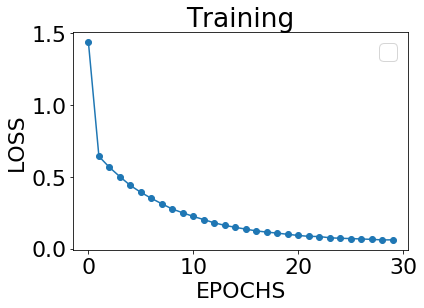

In [52]:
plt.plot([x for x in range(epoch)],history.history['loss'],marker='o')
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.legend()
plt.title("Training")
plt.show()

# Accuracy

No handles with labels found to put in legend.


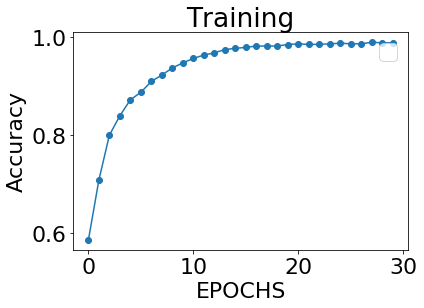

In [53]:
plt.plot([x for x in range(epoch)],history.history['acc'],marker='o')
plt.xlabel("EPOCHS")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training")
plt.show()

### Now Using the LSTM NETWORK

In [62]:
data = pd.read_csv(dirs+"train.csv")

In [63]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [54]:
from keras.layers import LSTM

In [91]:
def LstmBaseLine():
    model = Sequential()
    model.add(Embedding(10000, 64,input_length=xtrain.shape[1]))
    #10000 is the size of the vocabulary
    #64 is the output of the Dense Embedding 
    model.add(LSTM(128,
                   activation='relu',
                   return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128,activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(2,activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
    return model
    

In [92]:
LSTM_model = LstmBaseLine()

In [93]:
LSTM_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 70, 64)            640000    
_________________________________________________________________
lstm_11 (LSTM)               (None, 70, 128)           98816     
_________________________________________________________________
dropout_6 (Dropout)          (None, 70, 128)           0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 258       
Total params: 887,170
Trainable params: 887,170
Non-trainable params: 0
________________________________________________

In [94]:
lstm_history = LSTM_model.fit(xtrain,ytrain,epochs=10,batch_size=129)

c:\users\modi\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10
4064/4064 [==============================] - 14s 3ms/step - loss: 0.6748 - acc: 0.5685
Epoch 2/10
4064/4064 [==============================] - 13s 3ms/step - loss: 0.5383 - acc: 0.7532
Epoch 3/10
4064/4064 [==============================] - 13s 3ms/step - loss: 0.3472 - acc: 0.8729
Epoch 4/10
4064/4064 [==============================] - 13s 3ms/step - loss: 0.2028 - acc: 0.9218
Epoch 5/10
4064/4064 [==============================] - 13s 3ms/step - loss: 0.1290 - acc: 0.9552
Epoch 6/10
4064/4064 [==============================] - 13s 3ms/step - loss: 0.1004 - acc: 0.9657
Epoch 7/10
4064/4064 [==============================] - 13s 3ms/step - loss: 0.0822 - acc: 0.9735
Epoch 8/10
4064/4064 [==============================] - 13s 3ms/step - loss: 0.0644 - acc: 0.9760
Epoch 9/10
4064/4064 [==============================] - 13s 3ms/step - loss: 0.0504 - acc: 0.9843
Epoch 10/10
4064/4064 [==============================] - 13s 3ms/step - loss: 0.0454 - acc: 0.9824


In [95]:
LSTM_model.evaluate(xtest,ytest)

1016/1016 [==============================] - 1s 1ms/step


[1.3227276726970523, 0.751968502998352]

#### Applying Cross Validation on LSTM Model

In [145]:
cv = 4
accuracy = []
num_val_samples = int(xtrain.shape[0]/cv)
for i in range(cv):
    print('processing fold # {}'.format(i))
    kfold_xval = xtrain[
        i * num_val_samples:
        (i + 1) * num_val_samples]
    kfold_yval = ytrain[i * num_val_samples: (i + 1) * num_val_samples]
    Kfold_xtrain = np.concatenate(
    [xtrain[:i * num_val_samples],
    xtrain[(i + 1) * num_val_samples:]],
    )
    kfold_ytrain = np.concatenate(
    [ytrain[:i * num_val_samples],
    ytrain[(i + 1) * num_val_samples:]],
    )
    LSTM_model = LstmBaseLine()
    LSTM_model.fit(Kfold_xtrain,kfold_ytrain,epochs=5,batch_size=70,validation_data=(kfold_xval,kfold_yval),verbose=0)
    loss , acc= LSTM_model.evaluate(xtest,ytest)
    accuracy.append(acc)

processing fold # 0


c:\users\modi\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


1016/1016 [==============================] - 1s 1ms/step
processing fold # 1


c:\users\modi\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


1016/1016 [==============================] - 1s 1ms/step
processing fold # 2


c:\users\modi\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


1016/1016 [==============================] - 2s 2ms/step
processing fold # 3


c:\users\modi\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


1016/1016 [==============================] - 2s 2ms/step


In [146]:
print(accuracy,'--------------------',sep = '\n')
print("Avg test acc is ====> {}".format(sum(accuracy)/4))

[0.7573819160461426, 0.7682086825370789, 0.75, 0.7440944910049438]
--------------------
Avg test acc is ====> 0.7549212723970413


### Creating Submission File

In [218]:
prediction_data = LSTM_model.predict(padded_text)

In [224]:
finalresult = []
count = 0
for zero,one in prediction_data:
    if zero > one:
        finalresult.append(0)
    elif one > zero:
        finalresult.append(1)

In [262]:
ids = test_without_nan.iloc[:,0]

In [276]:
csv_data = {'id':ids,'target':finalresult}

In [277]:
results = pd.DataFrame(csv_data)

In [278]:
results.to_csv("sample.csv",index = False)

In [279]:
pd.read_csv('sample.csv')

,id,target
0,46,1
1,47,0
2,51,1
3,58,0
4,60,1
...,...,...
2153,10804,0
2154,10806,0
2155,10807,0
2156,10816,0


In [281]:
len(results)

2158

In [282]:
len(testdata)

3263